In [15]:
import numpy as np
from urllib.request import urlopen
from IPython.display import Image
import pandas as pd
from io import StringIO

At first I load the dataset

In [16]:
import pandas as pd

df = pd.read_csv('C:/Users/42977/Desktop/bme Data Science/data.csv', index_col=0)
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [17]:
df.shape

(195, 23)

In [18]:
x=df.iloc[:,:].values
y=pd.DataFrame(x)
y.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1.0
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1.0
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1.0
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1.0
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1.0


I separate the data into two sets, the training set and test set. The proportion is 2:8

In [19]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:21].values
Y = df.iloc[:,22].values
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y, 
                     test_size=0.20,
                     stratify=Y,
                     random_state=1)

In [20]:
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (156, 21)
Y_train shape:  (156,)
X_test shape:  (39, 21)
Y_test shape:  (39,)


Set the KNN model and use the gridsearchcv to find the best parameters of the model

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

param_grid = [
    {
       'weights':['distance'],
        'n_neighbors':(4, 5, 6, 7, 8, 9, 10),
        'p':[i for i in range(1,6)]
    },
    {
        'weights':['uniform'],
        'n_neighbors':(4, 5, 6, 7, 8, 9, 10)
    }
]

knn_clf = KNeighborsClassifier()

In [22]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(knn_clf,param_grid)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['distance'], 'n_neighbors': (4, 5, 6, 7, 8, 9, 10), 'p': [1, 2, 3, 4, 5]}, {'weights': ['uniform'], 'n_neighbors': (4, 5, 6, 7, 8, 9, 10)}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [23]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=4,
           weights='distance')

In [24]:
grid_search.best_score_

0.8333333333333334

In [25]:
grid_search.best_params_

{'n_neighbors': 5, 'p': 4, 'weights': 'distance'}

After I got the best parameters, I use the best parameters in the model to conduct k-fold cross validation

In [26]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
    
knn_clf = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=4,
           weights='distance')
kfold = StratifiedKFold(n_splits=10,
                        random_state=1).split(X_train, Y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    knn_clf.fit(X_train[train], Y_train[train])
    score = knn_clf.score(X_train[test], Y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(Y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [ 34 106], Acc: 0.812
Fold:  2, Class dist.: [ 34 106], Acc: 0.875
Fold:  3, Class dist.: [ 34 106], Acc: 0.688
Fold:  4, Class dist.: [ 34 106], Acc: 0.875
Fold:  5, Class dist.: [ 34 106], Acc: 0.750
Fold:  6, Class dist.: [ 34 106], Acc: 0.875
Fold:  7, Class dist.: [ 34 106], Acc: 0.750
Fold:  8, Class dist.: [ 34 106], Acc: 0.812
Fold:  9, Class dist.: [ 35 107], Acc: 0.786
Fold: 10, Class dist.: [ 35 107], Acc: 0.929

CV accuracy: 0.815 +/- 0.070


I make the graph of the learning curve with best paraameters

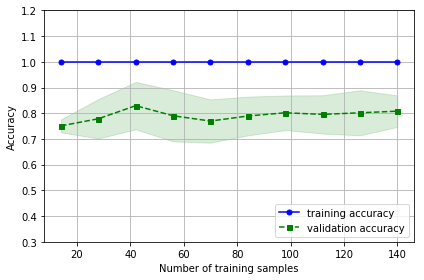

In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


knn = make_pipeline(StandardScaler(),knn_clf)

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=knn_clf,
                               X=X_train,
                               y=Y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.3, 1.2])
plt.tight_layout()
#plt.savefig('images/06_05.png', dpi=300)
plt.show()

Finally I make a graph of validation curve by using numbers of neighbors as X axis

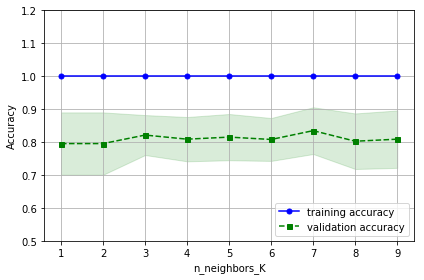

In [28]:
from sklearn.model_selection import validation_curve


param_range = [i for i in range(1,10)]

train_scores, test_scores = validation_curve(
                estimator=knn_clf, 
                X=X_train, 
                y=Y_train, 
                param_name = 'n_neighbors', 
                param_range=param_range,
                cv=10
                )

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('n_neighbors_K')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.2])
plt.tight_layout()
plt.show()